# Reto


In [ ]:
!pip install seaborn

##Conexión Drive

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd

Mounted at /content/gdrive
/content


In [ ]:
#put your own path in google drive
%cd "/content/gdrive/MyDrive/Colab Notebooks/Reto"
!ls

/content/gdrive/MyDrive/Colab Notebooks/Reto
gender_submission.csv  Results.csv  test.csv  train.csv


##Importar Datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB

##Visualización de Datos

In [ ]:
data = pd.read_csv('train.csv')
data.head()

X_test = pd.read_csv('test.csv')

In [ ]:
# Calcula la proporción de supervivientes y no supervivientes
survived_count = data['Survived'].value_counts()
total_samples = len(data)

# Imprime la proporción de supervivientes y no supervivientes
print("Proporción de supervivientes (clase 1): {:.2f}%".format((survived_count[1] / total_samples) * 100))
print("Proporción de no supervivientes (clase 0): {:.2f}%".format((survived_count[0] / total_samples) * 100))

Proporción de supervivientes (clase 1): 38.38%
Proporción de no supervivientes (clase 0): 61.62%


### Realizamos un count de los valores relacionados con la tasa de supervivencia y no supervivencia. Con base en esto obtenemos un valor de 38.38% para los supervivientes y 61.62 para los no supervivientes. Por ende, podemos determinar que los datos no están balanceados en el data set y es probable que la entropía sea más alta por este desequilibrio.

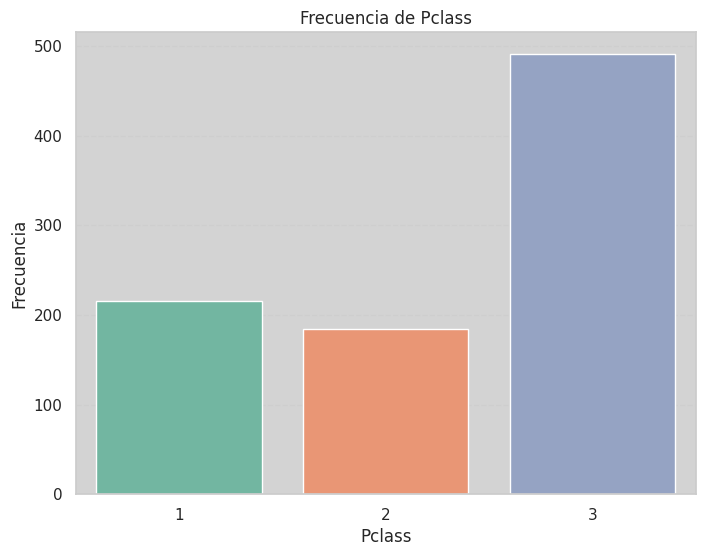

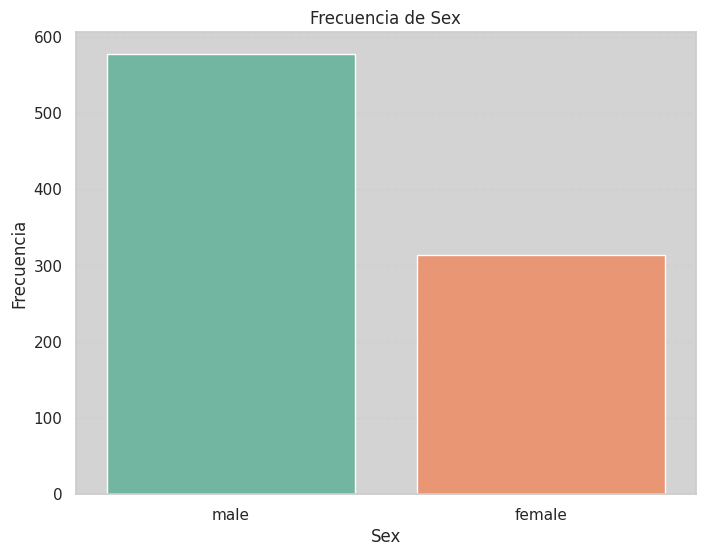

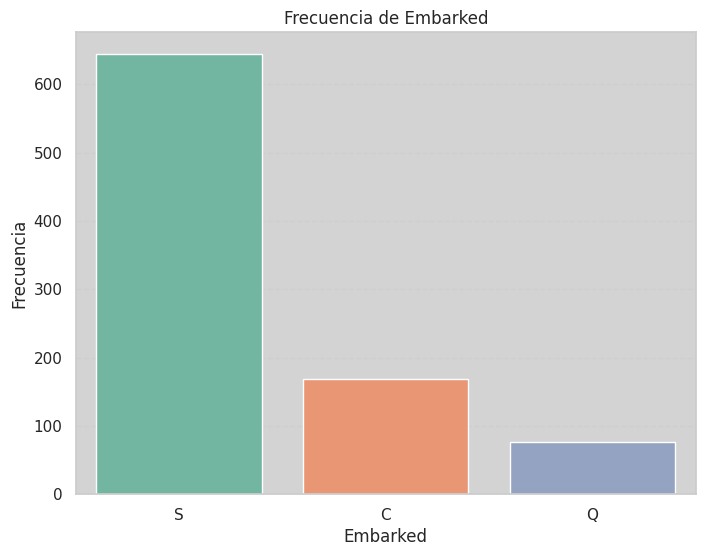

In [ ]:
categorical_variables = ['Pclass', 'Sex', 'Embarked']
# Configuración de estilo de seaborn para mejorar la apariencia de las gráficas
sns.set(style="whitegrid", palette="pastel")

# Realiza análisis de frecuencia y crea gráficos de barras para cada variable
for var in categorical_variables:
    plt.figure(figsize=(8, 6))

    # Crea un gráfico de barras con colores personalizados y etiquetas
    sns.countplot(data=data, x=var, palette="Set2")

    plt.title(f'Frecuencia de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

    # Añadir un fondo claro
    plt.gca().set_facecolor('lightgray')

    # Añadir una cuadrícula
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

### Hacemos un análisis de los valores categóricos de data set comparando las 3 frecuencias correspondientes con el sexo, la puerta de embarque y la clase del tripulante. Lo anterior con el fin de comprender mejor la composición de los datos, seleccionar los valores categóricos más relevantes, preparar los datos y convertirlos en valores numéricos. Asimismo podemos analizar las tendencias y patrones de los valores categóricos relacionados con la supervivencia de los tripulantes. Analizando las gráficas podemos observar que que la mayoría de la tripulación está ubicada en la clase 3. De igual forma en la distribución de género podemos ver que la mayoría eran hombres y apróximadamente la población de mujeres se encuentra a la mitad de la población de hombres.

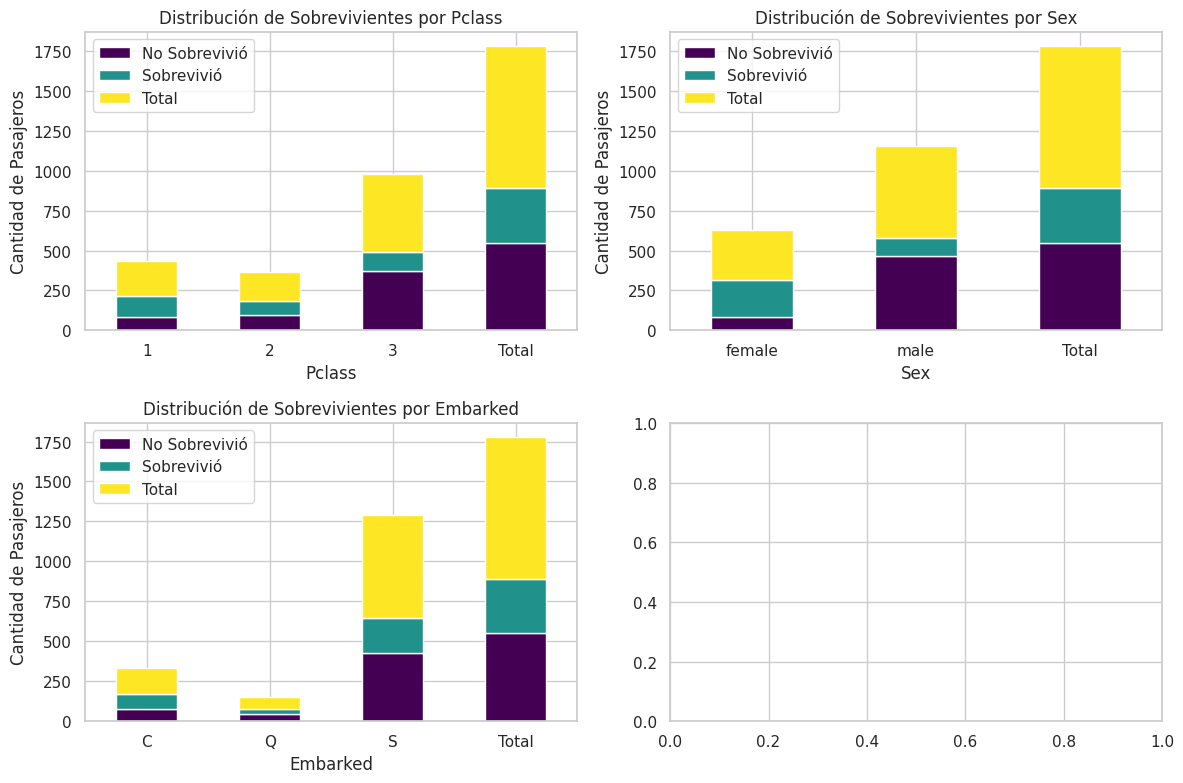

In [ ]:
num_rows = len(categorical_variables) // 2 + len(categorical_variables) % 2  # Número de filas
num_cols = 2  # Dos columnas

# Crea una figura con subtramas
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Itera a través de las características categóricas y analiza su relación con 'Survived'
for i, feature in enumerate(categorical_variables):
    row = i // num_cols  # Fila actual
    col = i % num_cols   # Columna actual

    # Crea una tabla de contingencia (crosstab) para la característica categórica y 'Survived'
    crosstab = pd.crosstab(data[feature], data['Survived'], margins=True, margins_name="Total")

    # Visualiza la tabla de contingencia como un gráfico de barras apiladas en la subtrama actual
    crosstab.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[row, col])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Cantidad de Pasajeros')
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=0)
    axes[row, col].set_title(f'Distribución de Sobrevivientes por {feature}')
    axes[row, col].legend(['No Sobrevivió', 'Sobrevivió', 'Total'])

# Ajusta automáticamente el espacio entre subtramas
plt.tight_layout()
plt.show()

### A continuación realizamos una comparación de la relación de los valores categóricos con la frecuencia de supervivientes y no supervivientes. Con el objetivo de identificar patrones y tendencias y poder tener una mejor visión a la hora de entrenar a los modelos. Además de poder seleccionar los valores relevantes, y determinar si existe correlación de estos con los valores númericos y en ese caso eliminar aquellos que sean redundantes. En primer lugar tenemos la gráfica relacionada con la clase. En relacion a esto podemos observar que los tripulantes con clase 1 presentan una tasa de supervivencia mayor a la tripulación en clase 3. Y la tripulación en clase 2 se observa tener una proporción balanceada entre supervivientes y no supervivientes. Pasando a la gráfica de sexo. Observamos que el sexo femenino cuenta con una tasa más alta de supervivencia. Por otro lado, el sexo masculino cuenta con un desequilibrio entre los supervivientes y no supervivientes. Finalmente relacionado con el puerto de embarque. Se puede observar que SouthHampton al ser el principal puerto de embarque. La mayoría de la tripulación ingresó por el mismo. Por lo que la tasa de no supervivencia se inclina en relación con este puerto.

In [ ]:
data['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

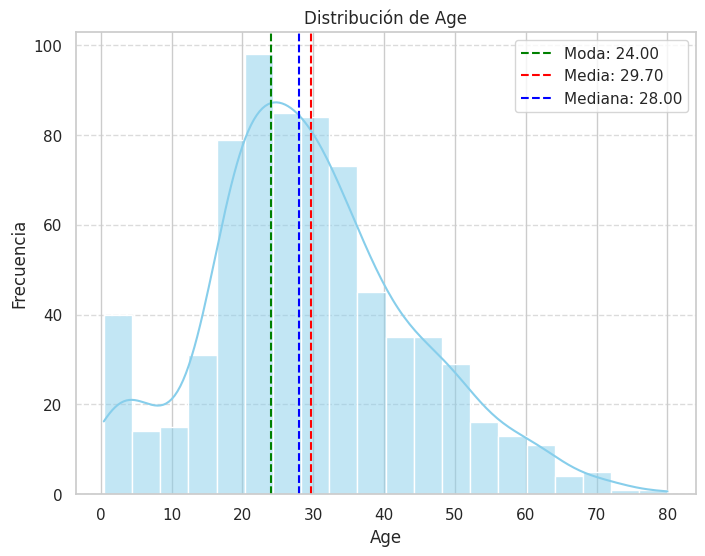

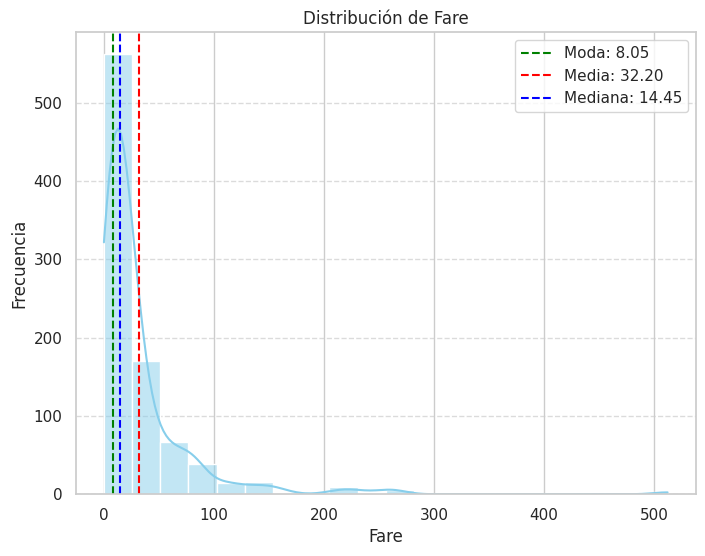

In [ ]:
# Variables numéricas relevantes
numeric_variables = ['Age', 'Fare']

for var in numeric_variables:
    plt.figure(figsize=(8, 6))

    # Crear histogramas con personalización visual
    sns.histplot(data=data, x=var, kde=True, color='skyblue', bins=20)

    # Calcular la moda, media y mediana
    mode_value = data[var].mode().values[0]
    mean_value = data[var].mean()
    median_value = data[var].median()

    # Añadir títulos y etiquetas
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

    # Añadir líneas de referencia
    plt.axvline(x=mode_value, color='green', linestyle='--', label=f'Moda: {mode_value:.2f}')
    plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Media: {mean_value:.2f}')
    plt.axvline(x=median_value, color='blue', linestyle='--', label=f'Mediana: {median_value:.2f}')

    # Mostrar una leyenda
    plt.legend()

    # Añadir una cuadrícula
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

### Primero realizamos un análisis de los valores númericos relevantes como son la edad y la tarifa. Sin embargo pudimos encontrar que la edad era una distribución normalizada pero por el otro lado la tarifa presentaba una distribución, por su gráfica, logarítmica. Por lo que realizamos un proceso de normalización.

In [ ]:
data['Fare'] = np.log1p(data['Fare'])

In [ ]:
threshold = 3  # Define un umbral apropiado
data = data[data['Fare'] < threshold]

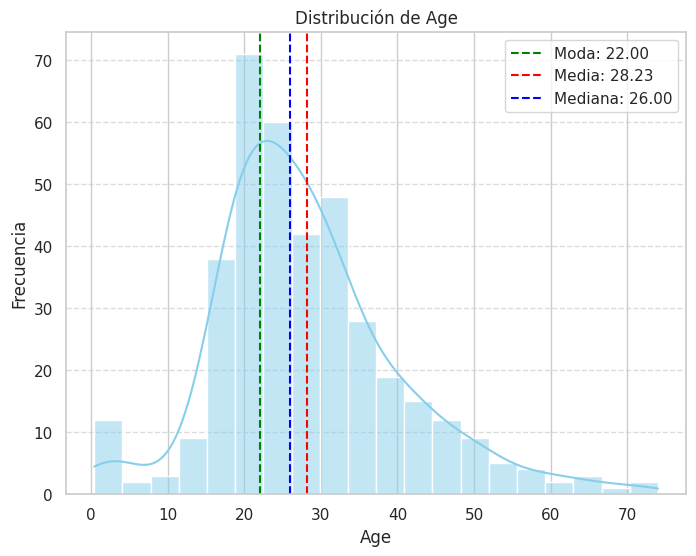

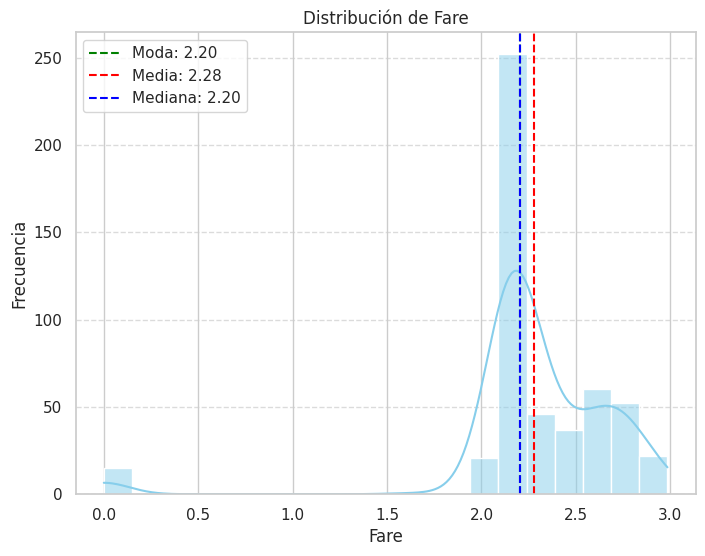

In [ ]:
# Variables numéricas relevantes
numeric_variables = ['Age', 'Fare']

for var in numeric_variables:
    plt.figure(figsize=(8, 6))

    # Crear histogramas con personalización visual
    sns.histplot(data=data, x=var, kde=True, color='skyblue', bins=20)

    # Calcular la moda, media y mediana
    mode_value = data[var].mode().values[0]
    mean_value = data[var].mean()
    median_value = data[var].median()

    # Añadir títulos y etiquetas
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

    # Añadir líneas de referencia
    plt.axvline(x=mode_value, color='green', linestyle='--', label=f'Moda: {mode_value:.2f}')
    plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Media: {mean_value:.2f}')
    plt.axvline(x=median_value, color='blue', linestyle='--', label=f'Mediana: {median_value:.2f}')

    # Mostrar una leyenda
    plt.legend()

    # Añadir una cuadrícula
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

### Una vez que realizamos el proceso de normalización logarítmica, y pudimos observar que ahora ambas distribuciones están normalizadas y por ende podemos continuar con la visualización de datos faltantes.

###Visualización de datos Faltantes

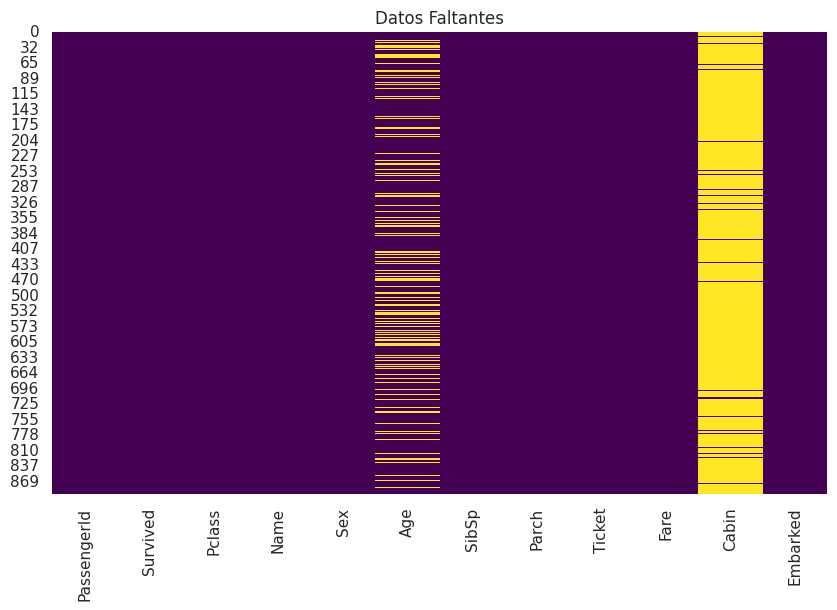

In [ ]:
# Identificar datos faltantes
missing_data = data.isnull()
missing_data_test = X_test.isnull()

# Visualizar datos faltantes con un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(data=missing_data, cmap='viridis', cbar=False)
plt.title('Datos Faltantes')
plt.show()

### Debido a que la columna cabin cuenta con demasiados datos faltantes, tomamos la decisión de eliminarla debido a que es un valor categórico que no tenía relación con la supervivencia de los tripulantes.

Se elimina la columna Cabin debido a datos faltantes:

In [ ]:
# Eliminar la columna 'Cabin'
data.drop('Cabin', axis=1, inplace=True)
X_test.drop('Cabin', axis=1, inplace=True)


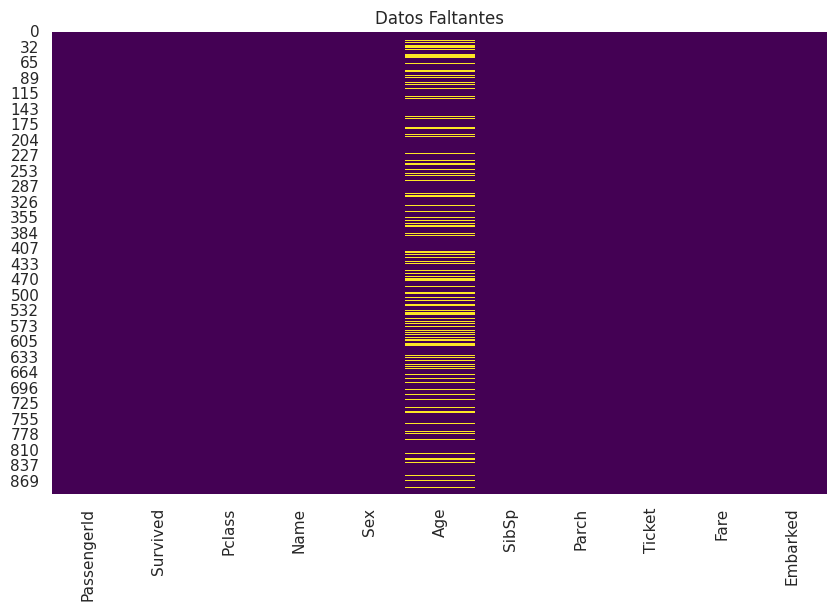

In [ ]:
# Identificar datos faltantes
missing_data = data.isnull()
missing_data_test = X_test.isnull()

# Visualizar datos faltantes con un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(data=missing_data, cmap='viridis', cbar=False)
plt.title('Datos Faltantes')
plt.show()

### Posteriormente la columna age también presentaba una gran cantidad de datos faltantes por lo que decidimos rellenar estos datos con el promedio. Ya que el promedio y la mediana son valores bastante cercanos y con la mediana tenemos una mayor robustez ante valores atípicos.

Inputación de datos:

In [ ]:
# Imputación por la media en la columna 'Age'
mean_age = data['Age'].mean()
median_age = data['Age'].median()
data['Age'].fillna(mean_age, inplace=True)
print(mean_age)
print(median_age)

# Imputación por la media en la columna 'Age' en X_test
mean_age_test = X_test['Age'].mean()
X_test['Age'].fillna(mean_age_test, inplace=True)
print(mean_age_test)

# For Fare column
fare_mean = X_test["Fare"].mean()
X_test["Fare"].fillna(fare_mean, inplace=True)

28.229662337662337
26.0
30.272590361445783


In [ ]:
# Imputación por la media en la columna 'Embarked'
mode_emb = data['Embarked'].mode()[0]  # Obtener el primer valor del modo (si hay varios modos)
# Rellenar los valores faltantes con el modo
data['Embarked'].fillna(mode_emb, inplace=True)
print(mode_emb)

# Imputación por la media en la columna 'Embarked' en X_test
mode_emb_test = X_test['Embarked'].mode()[0]
X_test['Embarked'].fillna(mode_emb_test, inplace=True)
print(mode_emb_test)

S
S


### Asimismo rellenamos los valores faltantes de la columna embarked con la moda. Ya que al tratarse de un valor categórico es la alternativa más viables al no contarse con mediana o promedio.

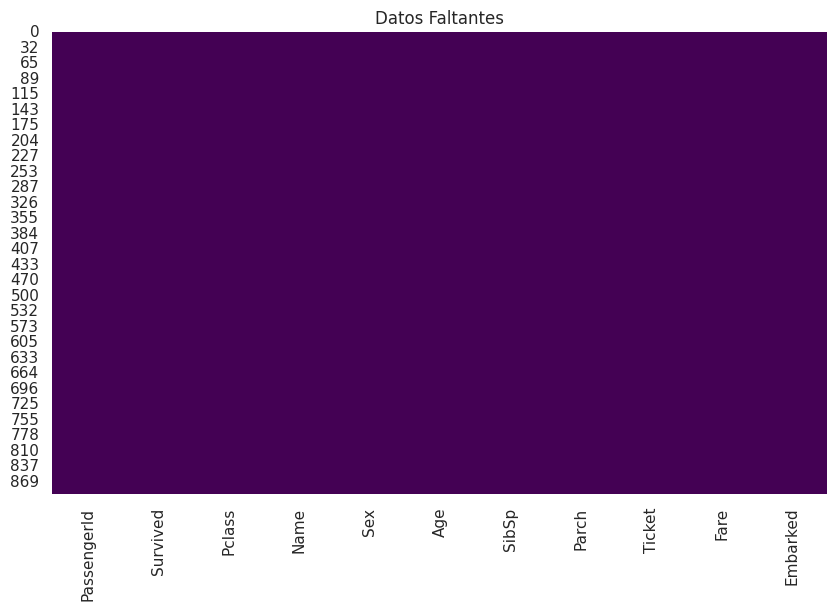

In [ ]:
# Identificar datos faltantes
missing_data = data.isnull()
missing_data_test = X_test.isnull()

# Visualizar datos faltantes con un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(data=missing_data, cmap='viridis', cbar=False)
plt.title('Datos Faltantes')
plt.show()

###Análisis de correlación

<ipython-input-20-d899c9cd26ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


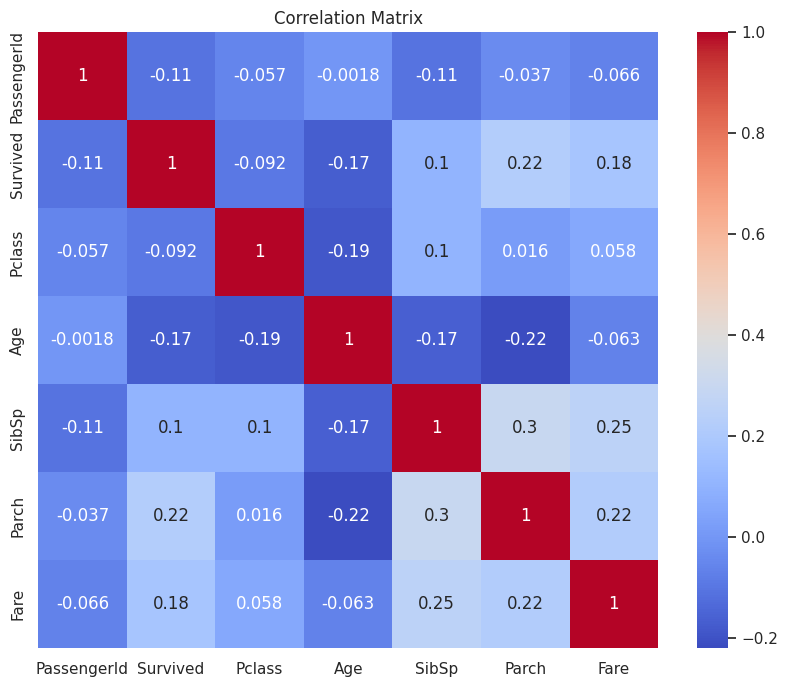

In [ ]:
correlation_matrix = data.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Generamos una matriz de correlación con el fin de analizar aquellos datos que presentan una relación y con base en esto determinar cuáles son los valores que podrían considerarse más relevantes para el entrenamiento de los modelos. Lo anterior lo podemos ver en la tarifa y la cpclass. Estos dos valores cuentan con una correlación inversa en la cual a mayor tarifa la clase es menor valor, ya que está enumerada de 1 a 3. Por ejemplo, para una tarifa de 71 tenemos una clase 1 y para una tarifa de 7 tenemos una clase 3.

###Transformación de datos:

One-Hot Encoding

In [ ]:
data_encoded = pd.get_dummies(data, columns=['Embarked', 'Pclass', 'Sex'])
data_encoded_test = pd.get_dummies(X_test, columns=['Embarked', 'Pclass', 'Sex'])

In [ ]:
data_encoded

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,2.110213,0,0,1,0,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,2.188856,0,0,1,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,2.202765,0,0,1,0,0,1,0,1
5,6,0,"Moran, Mr. James",28.229662,0,0,330877,2.246893,0,1,0,0,0,1,0,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,2.495954,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,"Dahlberg, Miss. Gerda Ulrika",22.000000,0,0,7552,2.443798,0,0,1,0,0,1,1,0
883,884,0,"Banfield, Mr. Frederick James",28.000000,0,0,C.A./SOTON 34068,2.442347,0,0,1,0,1,0,0,1
884,885,0,"Sutehall, Mr. Henry Jr",25.000000,0,0,SOTON/OQ 392076,2.085672,0,0,1,0,0,1,0,1
886,887,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,2.639057,0,0,1,0,1,0,0,1


Label Encoding

In [ ]:
data_copy = data.copy()
data_copy_test = X_test.copy()

In [ ]:
label_encoder = LabelEncoder()
data_copy['Embarked'] = label_encoder.fit_transform(data_copy['Embarked'])
data_copy['Sex'] = label_encoder.fit_transform(data_copy['Sex'])

data_copy_test['Embarked'] = label_encoder.fit_transform(data_copy_test['Embarked'])
data_copy_test['Sex'] = label_encoder.fit_transform(data_copy_test['Sex'])

In [ ]:

data_copy_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,2


### Posteriormente realizamos una transformación de los datos categóricos a númericos para poder entrenar los modelos. Usamos dos métodos, one hot enconding y label enconding. Decidimos utilizar label encoding debido a que existen demasiadas categorias y podemos reducir la dimensionalidad de la tabla.

##Clasificación:

###Selección de Clasificadores:

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

def plot_confusion_matrix_and_roc(y_true, y_pred, y_proba, labels):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[0])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')
    axes[0].set_title('Confusion Matrix')

    # Plot ROC curve
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[1].legend(loc='lower right')

    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()

def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm_labels = np.unique(y_test)

    # Call the modified plot_confusion_matrix_and_roc function
    plot_confusion_matrix_and_roc(y_test, y_pred, y_proba, labels=cm_labels)

    return accuracy, precision, recall, f1


### Creamos la función para obtener la matriz de correlación y las gráficas ROC como métricas de evaluación. De igual forma, creamos la función para evaluar los modelos con los datos en X_train y y_train.

In [ ]:
import numpy as np

X_train = data_copy[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y_train = data_copy[['Survived']]

solution = pd.read_csv('gender_submission.csv')
X_test = data_copy_test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y_test = solution[['Survived']]

y_train = np.ravel(y_train)

###Best Params Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define el modelo RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define una cuadrícula de hiperparámetros para buscar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras requeridas en un nodo hoja
    'bootstrap': [True, False]  # Si se deben usar muestras de arranque al construir árboles
}

# Crea un objeto GridSearchCV para buscar hiperparámetros en la cuadrícula
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajusta el modelo utilizando búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Obtiene el mejor modelo y los mejores hiperparámetros
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evalúa el modelo en el conjunto de prueba
accuracy = best_rf_model.score(X_test, y_test)
print(f'Accuracy del mejor modelo: {accuracy:.2f}')
print(f'Mejores hiperparámetros: {best_params}')


Accuracy del mejor modelo: 0.92
Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


###Best Params Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define el modelo Logistic Regression
logistic_classifier = LogisticRegression(random_state=42)

# Define una cuadrícula de hiperparámetros para buscar
param_grid = {
    'C': [0.1, 1, 10],  # Parámetro de regularización
    'max_iter': [100, 200, 300],  # Número máximo de iteraciones
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga']  # Método de solución
}

# Crea un objeto GridSearchCV para buscar hiperparámetros en la cuadrícula
grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajusta el modelo utilizando búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Obtiene el mejor modelo y los mejores hiperparámetros
best_logistic_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evalúa el modelo en el conjunto de prueba
accuracy = best_logistic_model.score(X_test, y_test)
print(f'Accuracy del mejor modelo: {accuracy:.2f}')
print(f'Mejores hiperparámetros: {best_params}')


Accuracy del mejor modelo: 0.54
Mejores hiperparámetros: {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}


###Best Params NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define el modelo Naive Bayes
naive_bayes_classifier = MultinomialNB()

# Define una cuadrícula de hiperparámetros para buscar
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Parámetro de suavizado
    # Otros parámetros específicos de MultinomialNB si los tienes
}

# Crea un objeto GridSearchCV para buscar hiperparámetros en la cuadrícula
grid_search = GridSearchCV(estimator=naive_bayes_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajusta el modelo utilizando búsqueda de cuadrícula
grid_search.fit(X_train, y_train)  # X_train son tus datos originales, no vectorizados

# Obtiene el mejor modelo y los mejores hiperparámetros
best_naive_bayes_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evalúa el modelo en el conjunto de prueba
accuracy = best_naive_bayes_model.score(X_test, y_test)  # X_test son tus datos de prueba originales, no vectorizados
print(f'Accuracy del mejor modelo: {accuracy:.2f}')
print(f'Mejores hiperparámetros: {best_params}')


Accuracy del mejor modelo: 0.62
Mejores hiperparámetros: {'alpha': 0.1}


###Best Params KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define el modelo K-Nearest Neighbors (K-NN)
knn_classifier = KNeighborsClassifier()

# Define una cuadrícula de hiperparámetros para buscar
param_grid = {
    'n_neighbors': [3, 5, 7],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Pesos de los vecinos
    'p': [1, 2]  # Parámetro de la métrica de distancia (1: distancia de Manhattan, 2: distancia euclidiana)
}

# Crea un objeto GridSearchCV para buscar hiperparámetros en la cuadrícula
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajusta el modelo utilizando búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Obtiene el mejor modelo y los mejores hiperparámetros
best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evalúa el modelo en el conjunto de prueba
accuracy = best_knn_model.score(X_test, y_test)
print(f'Accuracy del mejor modelo: {accuracy:.2f}')
print(f'Mejores hiperparámetros: {best_params}')


Accuracy del mejor modelo: 0.64
Mejores hiperparámetros: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


### Creamos las funciones correspondientes para cada algoritmo y de esta forma obtener los mejores hipérparametros y obtener la mejor precisión de cada uno con respecto al data set dado.

Best Params KNN

In [ ]:
best_params_knn = {
    'n_neighbors': 7, 'p': 1, 'weights': 'uniform'
}

Best Params NB

In [ ]:
best_params_nb = {
    'alpha': 0.1
}

Best Params RL


In [ ]:
best_params_lr = {
    'C': 1, 'max_iter': 100, 'solver': 'newton-cg'
}


best params RF

In [ ]:
best_params_rf = {
    'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300
}


###Modelos

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(**best_params_rf, random_state=42),
    "Logistic Regression": LogisticRegression(**best_params_lr, random_state=42),
    "Naive Bayes": MultinomialNB(**best_params_nb),
    "K-Nearest Neighbors": KNeighborsClassifier(**best_params_knn)
}

### Decidimos ocupar 4 algoritmos para nuestro desafío de Titanic, entre los cuales se encuentran: random forest, logistic regression y knn.


*   Random Forest: Usamos este algoritmo debido a su robustez y versatilidad con los datos del data set del desafío. Debido a que este algoritmo combina múltiples árboles de decisión, lo que resulta en un modelo resistente al sobreajuste y capaz de manejar eficazmente datos faltantes, comunes en el conjunto de datos del Titanic. Además de su habilidad para manejar características categóricas y ofrece un buen rendimiento inicial sin ajustes complicados de hiperparámetros.
*   Logistic Regression: Este algoritmo lo escogimos debido a la naturaleza del desafío. Ya que el problema implica una clasificación binaria, lo que se adapta naturalmente a la regresión logística. Es eficiente desde el punto de vista computacional, lo que es beneficioso para conjuntos de datos de tamaño moderado a grande.
*   KNN: Finalmente escogimos el algoritmo KNN debido a que es versátil y puede manejar tanto características numéricas como categóricas presentes en el conjunto de datos. Asimismo, su simplicidad y facilidad de interpretación lo hacen apropiado para tareas de clasificación binaria como la predicción de supervivencia en el Titanic. También nos ofrece la flexibilidad de ajustar el número de vecinos durante la validación cruzada para optimizar el rendimiento.
* Naive Bayes: En este caso, elegimos implementar Naive Bayes como uno de nuestros modelos de clasificación porque es un algoritmo adecuado para datos categóricos y textuales, como el género y el puerto de embarque en nuestro conjunto de datos. Además, Naive Bayes funciona bien cuando hay múltiples características independientes, y en nuestro conjunto de datos, teníamos varias características que podrían influir de manera independiente en la supervivencia de un pasajero, como el género, la edad y el puerto de embarque. También tuvimos en cuenta que Naive Bayes es eficiente y suele tener buen rendimiento en problemas de clasificación, lo que lo convirtió en una elección importante para este reto




Training and evaluating Random Forest...


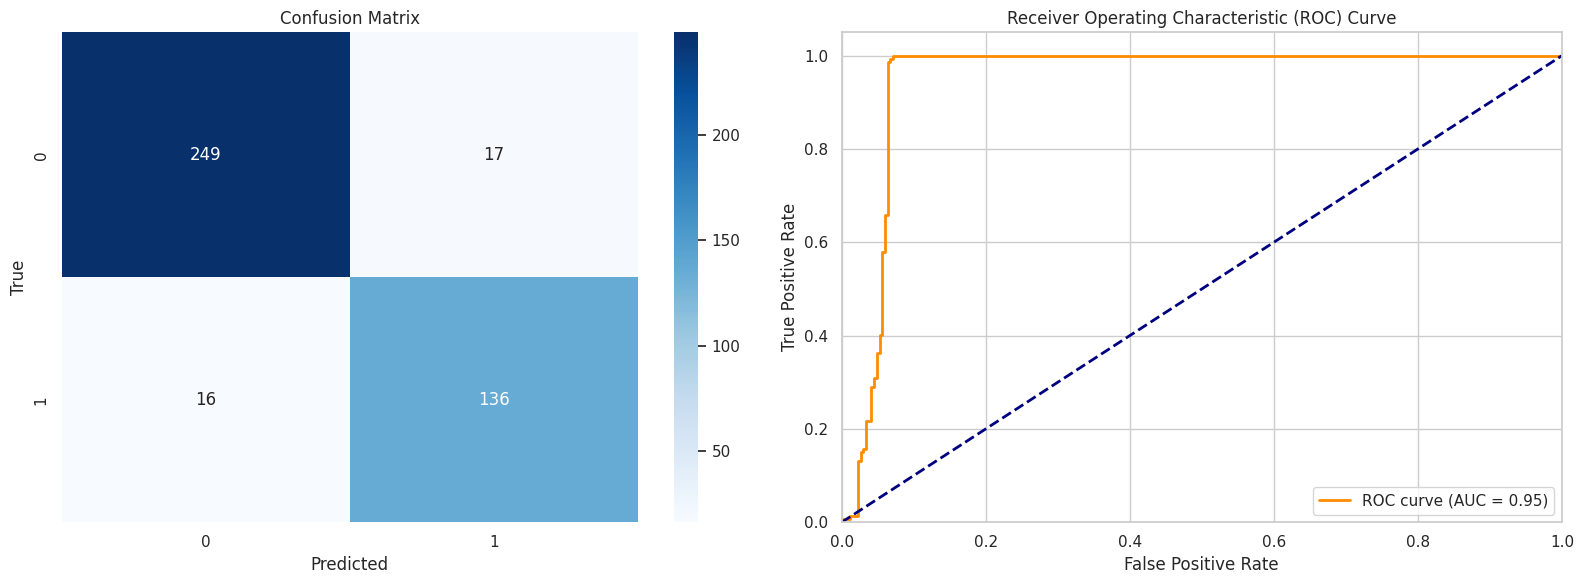

Random Forest:
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1-score: 0.92
Training and evaluating Logistic Regression...


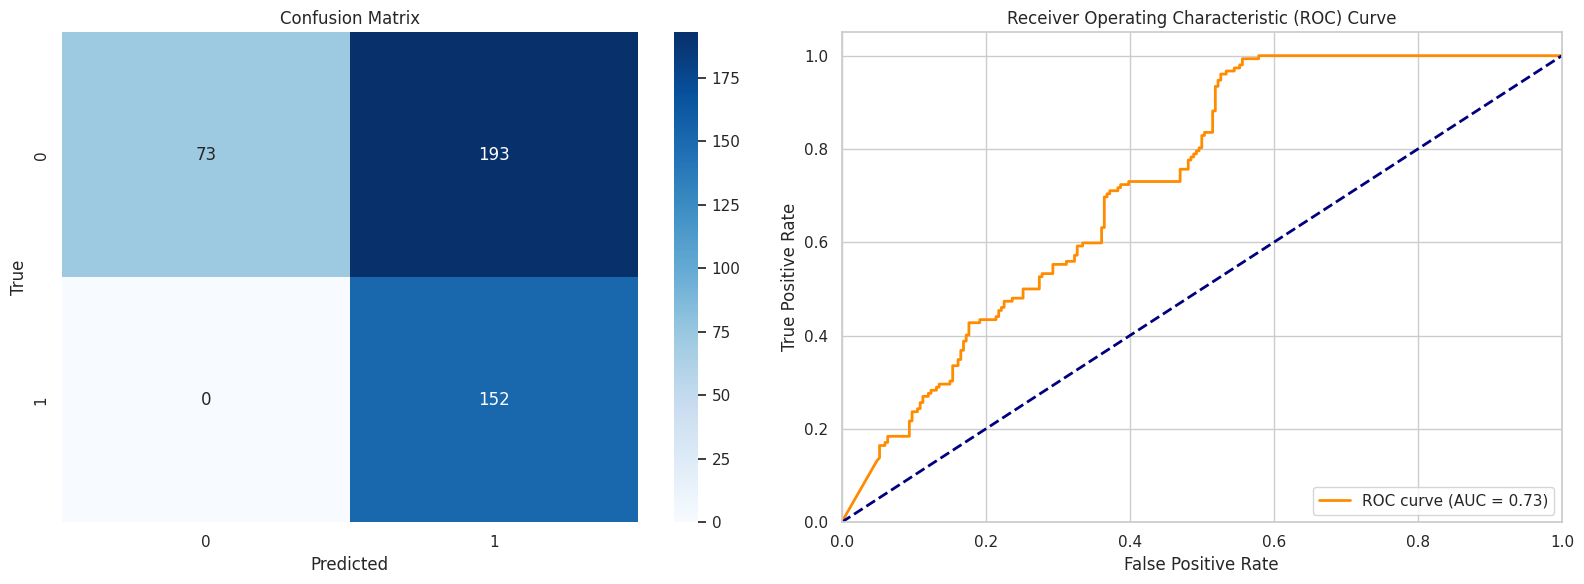

Logistic Regression:
Accuracy: 0.54
Precision: 0.80
Recall: 0.54
F1-score: 0.50
Training and evaluating Naive Bayes...


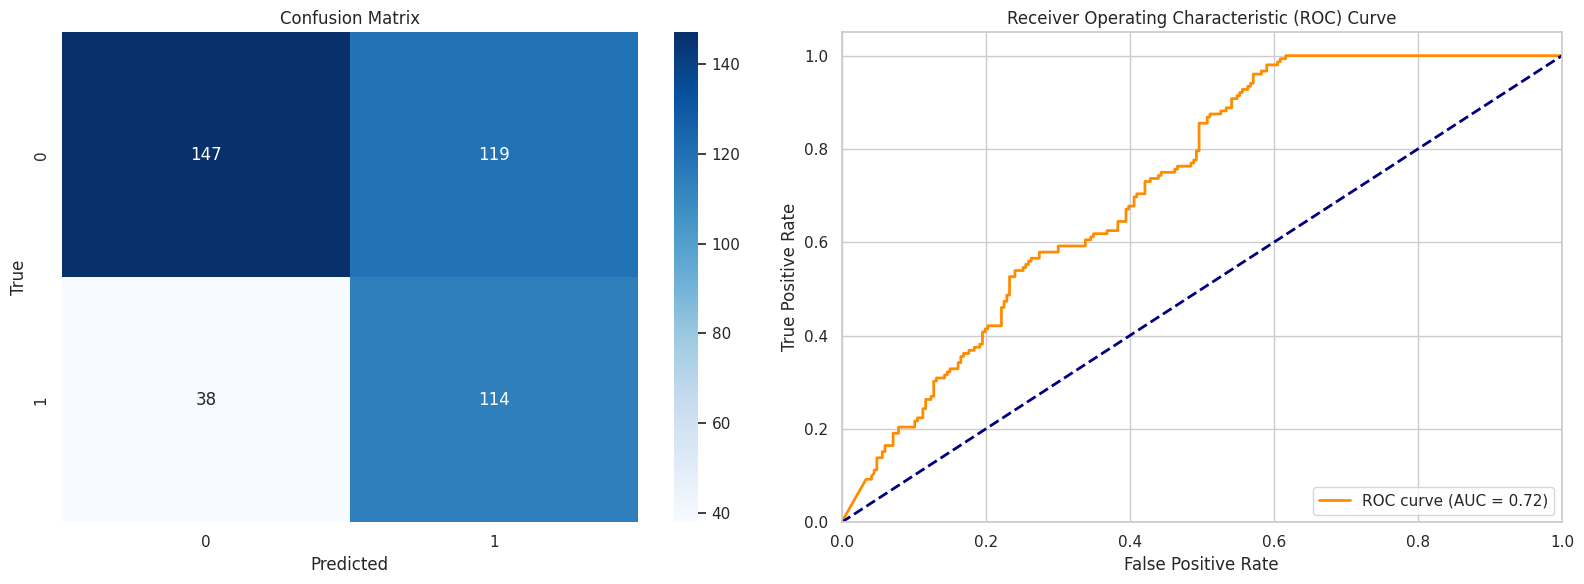

Naive Bayes:
Accuracy: 0.62
Precision: 0.68
Recall: 0.62
F1-score: 0.63
Training and evaluating K-Nearest Neighbors...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


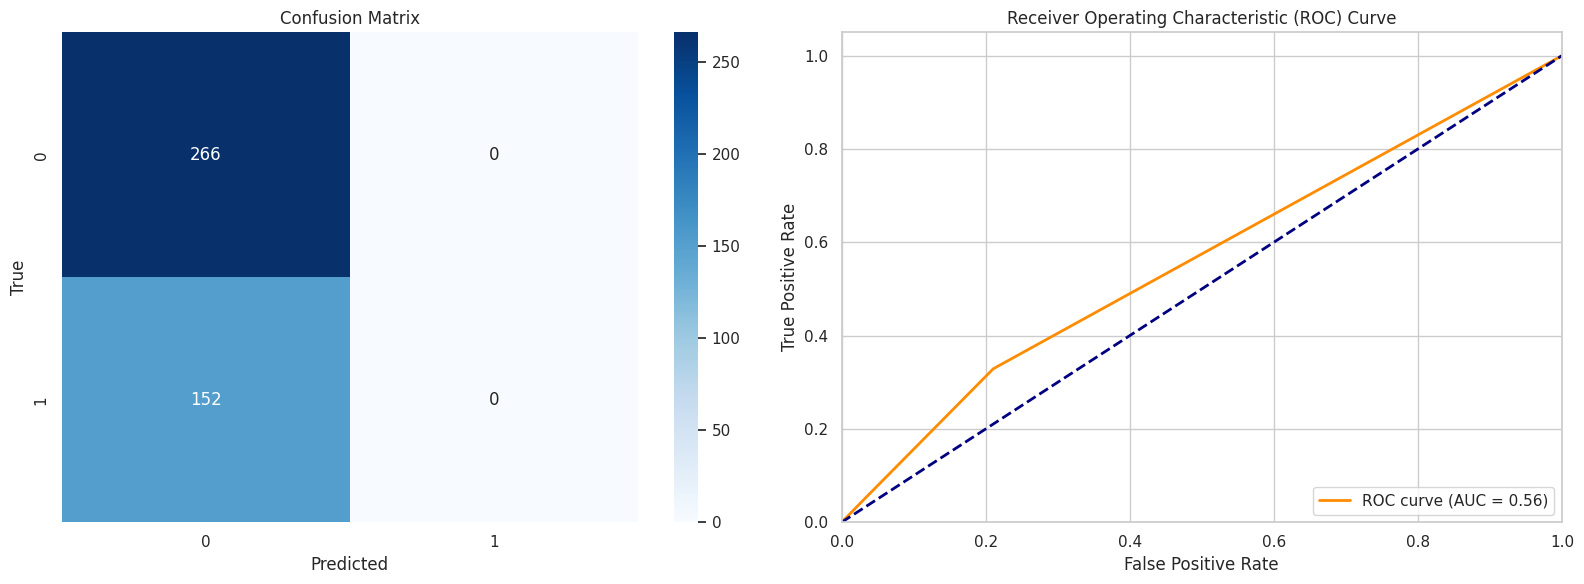

K-Nearest Neighbors:
Accuracy: 0.64
Precision: 0.40
Recall: 0.64
F1-score: 0.49


In [ ]:
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    accuracy, precision, recall, f1 = train_evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print("=" * 40)

### Análisis métricas resultados:
* Los resultados obtenidos para el modelo Random Forest son muy alentadores, con una precisión, recall y F1-score todos iguales a 0.92. Estos valores reflejan la capacidad del modelo para predecir con precisión tanto los casos positivos (sobrevivientes) como los casos negativos (no sobrevivientes). Una precisión del 92% significa que el 92% de las predicciones realizadas por el modelo son correctas en comparación con los valores reales. El recall del 92% indica que el modelo es capaz de capturar el 92% de todos los verdaderos casos positivos en el conjunto de datos. El F1-score, que combina precisión y recall, también es del 92%, lo que sugiere un buen equilibrio entre la precisión y la exhaustividad del modelo. Estos resultados son prometedores y sugieren que el modelo Random Forest es efectivo en la tarea de clasificar la supervivencia de los pasajeros en el conjunto de datos del Titanic con un alto nivel de precisión.
* Los resultados para el modelo de Regresión Logística presentan un panorama diferente en comparación con el modelo Random Forest. Aunque la precisión es del 54%, lo que significa que el 54% de las predicciones son correctas, el recall es del 54%, lo que indica que el modelo no es muy eficiente en la captura de los casos positivos reales. Esto sugiere que el modelo de Regresión Logística tiende a perder algunos de los verdaderos sobrevivientes en sus predicciones. El valor de precisión del 80% es relativamente alto, lo que indica que cuando el modelo predice la supervivencia, tiene una alta probabilidad de ser correcto. Sin embargo, el F1-score, que combina precisión y recall, es del 50%, lo que sugiere que el modelo tiene un desequilibrio entre precisión y exhaustividad. En general, estos resultados indican que el modelo de Regresión Logística podría necesitar mejoras para ser más eficaz en la clasificación de la supervivencia de los pasajeros en el conjunto de datos del Titanic.
* Los resultados para el modelo Naive Bayes muestran un rendimiento intermedio en comparación con los modelos anteriores. La precisión del 62% indica que aproximadamente el 62% de las predicciones son correctas, mientras que el recall del 62% sugiere que el modelo captura una cantidad razonable de los verdaderos casos positivos en el conjunto de datos. El valor de precisión del 68% muestra que cuando el modelo predice la supervivencia, es probable que esté en lo correcto. El F1-score, que combina precisión y recall, es del 63%, lo que indica un equilibrio moderado entre la precisión y la exhaustividad del modelo. En general, estos resultados sugieren que el modelo Naive Bayes tiene un rendimiento aceptable en la clasificación de la supervivencia de los pasajeros en el conjunto de datos del Titanic, aunque podría no ser tan preciso como el modelo Random Forest, pero tampoco tan desequilibrado como el modelo de Regresión Logística.
* Los resultados para el modelo K-Nearest Neighbors (K-NN) muestran un rendimiento que varía en comparación con los modelos anteriores. La precisión del 64% indica que aproximadamente el 64% de las predicciones son correctas, lo que es un valor moderado. Sin embargo, el recall del 64% sugiere que el modelo captura una cantidad significativa de los verdaderos casos positivos en el conjunto de datos, lo que es positivo. El valor de precisión del 40% indica que cuando el modelo predice la supervivencia, es menos probable que esté en lo correcto en comparación con los otros modelos evaluados. El F1-score, que combina precisión y recall, es del 49%, lo que sugiere un equilibrio razonable entre precisión y exhaustividad. En resumen, los resultados indican que el modelo K-NN tiene un rendimiento aceptable en la clasificación de la supervivencia de los pasajeros en el conjunto de datos del Titanic, pero podría beneficiarse de una mejora en la precisión de sus predicciones.

In [ ]:
import pandas as pd

best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)

y_pred_rf = best_rf_model.predict(X_test)

results_df = pd.DataFrame({
    'PassengerId': X_test['PassengerId'],
    'Survived': y_pred_rf
})

results_df.to_csv('Results.csv', index=False)


### Train-test-validate split:
En el reto ya vienen los datasets separados, por lo cual no podemos usar k-cross validation, pero para usarlo, sumaremos los dos datasets y con esos X & Y combinados haremos la separación.

In [ ]:
y_test_uni = y_test.values.ravel()

X_combined = pd.concat([X_train, X_test], axis=0)

y_combined = np.concatenate([y_train, y_test_uni])


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(**best_params_rf, random_state=42)

In [ ]:
k_values = [2, 5, 7, 10, 12, 15]

In [ ]:
for k in k_values:
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring='accuracy')

    mean_score = scores.mean()
    std_score = scores.std()

    print(f'Valor de k: {k}')
    print(f'Puntuación promedio: {mean_score:.2f}')
    print(f'Desviación estándar: {std_score:.2f}')
    print("=" * 40)


Valor de k: 2
Puntuación promedio: 0.91
Desviación estándar: 0.00
Valor de k: 5
Puntuación promedio: 0.90
Desviación estándar: 0.04
Valor de k: 7
Puntuación promedio: 0.90
Desviación estándar: 0.02
Valor de k: 10
Puntuación promedio: 0.90
Desviación estándar: 0.04
Valor de k: 12
Puntuación promedio: 0.90
Desviación estándar: 0.04
Valor de k: 15
Puntuación promedio: 0.90
Desviación estándar: 0.05
